In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('/content/marital status.csv')

In [3]:
df.head()

,age,status
0,21,0.0
1,33,1.0
2,24,0.0
3,28,1.0
4,17,0.0


In [9]:
df.shape

(20, 2)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     20 non-null     int64  
 1   status  19 non-null     float64
dtypes: float64(1), int64(1)
memory usage: 448.0 bytes


In [5]:
df.isnull().sum()

age       0
status    1
dtype: int64

In [10]:
df.shape

(20, 2)

In [13]:
df.dtypes

age         int64
status    float64
dtype: object

In [14]:
df['status'].value_counts()

0.0    10
1.0     9
Name: status, dtype: int64

In [16]:
df.iloc[:,:].values

array([[21.,  0.],
       [33.,  1.],
       [24.,  0.],
       [28.,  1.],
       [17.,  0.],
       [33.,  1.],
       [23.,  0.],
       [30.,  0.],
       [29.,  1.],
       [22.,  0.],
       [26.,  1.],
       [20.,  0.],
       [22.,  0.],
       [24., nan],
       [34.,  1.],
       [29.,  1.],
       [16.,  0.],
       [18.,  0.],
       [26.,  1.],
       [25.,  1.]])

In [17]:
df.dropna(subset=["status"])

,age,status
0,21,0.0
1,33,1.0
2,24,0.0
3,28,1.0
4,17,0.0
5,33,1.0
6,23,0.0
7,30,0.0
8,29,1.0
9,22,0.0


In [18]:
df.dropna(inplace=True)

In [19]:
df.shape

(19, 2)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


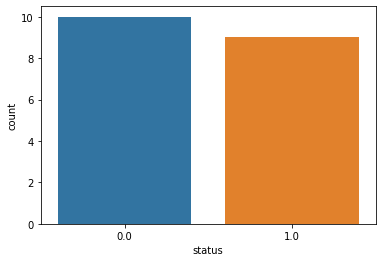

In [15]:
sns.countplot(df['status'],label="Count")

In [20]:
df.iloc[:,:].corr()

,age,status
age,1.00000,0.74548
status,0.74548,1.00000


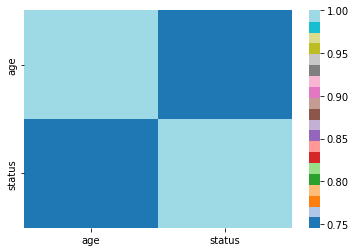

In [21]:
sns.heatmap(df.iloc[:,:].corr(),cmap="tab20")

In [34]:
X=df.iloc[:,:1]
Y=df.iloc[:,:1]


In [23]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.20,random_state=0)

In [48]:
X=X.reshape(-1,1)

In [50]:
Y=Y.reshape(-1,1)

In [53]:
X_train=X_train.values.reshape(-1,1)

In [55]:
X_test=X_test.values.reshape(-1,1)

In [56]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.fit_transform(X_test)

In [57]:
def model(X_train,Y_train):
  from sklearn.linear_model import LogisticRegression
  log=LogisticRegression(random_state=0)
  log.fit(X_train,Y_train)
  print("Accuracy",log.score(X_train,Y_train))
  return log

In [58]:
m=model(X_train,Y_train)

Accuracy 0.8666666666666667


In [62]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [63]:
print ("Accuracy : ", accuracy_score(Y_test, Y_pred)) 
print (classification_report(Y_test, Y_pred))

Accuracy :  0.25
              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00         0
         1.0       1.00      0.25      0.40         4

    accuracy                           0.25         4
   macro avg       0.50      0.12      0.20         4
weighted avg       1.00      0.25      0.40         4



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
